In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
import numpy as np
import pandas as pd
import os
import re

import matplotlib as mpl
mpl.rcParams['figure.facecolor'] = 'white'

### Load and preprocess data

Read all partial data files and merge them into a complete dataframe

In [2]:
def read_all_shop_info(data_dir):
  df_list = []
  filename_list = sorted([os.path.join(data_dir,f) for f in os.listdir(data_dir)])
  for filepath in filename_list:
    df_list.append(pd.read_csv(filepath, sep = '\t'))
  df = pd.concat(df_list)
  df.drop_duplicates(subset='Tên cửa hàng', inplace = True)
  df.reset_index(drop = True, inplace = True)
  return df

In [3]:
df = read_all_shop_info('NewData')
df

,Loại cửa hàng,Tên cửa hàng,Địa chỉ cửa hàng,Số sao trên ShopeeFood,Số lượt đánh giá trên ShopeeFood,Thời gian mở cửa,Giá thấp nhất,Giá cao nhất,Phí dịch vụ,Số sao trên Foody,Số lượt đánh giá trên Foody,Cửa hàng có menu
0,Quán ăn,Hủ Tiếu Nam Vang Hòa Phát - Nguyễn Thanh Sơn,"36A Nguyễn Thanh Sơn, P. Thạnh Mỹ Lợi, Thủ Đức...",4.5,100+,06:30 - 21:45,"30,000","50,000",0.0%,<span>_._</span>,0,1
1,Quán ăn,HỦ TIẾU NAM VANG NAM KIỆT - Hủ Tiếu Nam Vang -...,"38A Nguyễn Thanh Sơn, P. Thạnh Mỹ Lợi, Thủ Đức...",3.0,8,06:00 - 21:00,0,0,0.0%,<span>_._</span>,0,1
2,Quán ăn,Dose Coffee - Nguyễn Thanh Sơn,"11 Nguyễn Thanh Sơn, P. Thạnh Mỹ Lợi, Thủ Đức,...",5.0,10+,07:00 - 17:00,0,0,0.0%,<span>_._</span>,0,1
3,Café/Dessert,Phúc Long Đảo Kim Cương,"Khu Thương Mại B2.2B, Tầng B2, Tháp Bora Bora,...",4.5,100+,07:00 - 22:00,"30,000","100,000",0.0%,<span>_._</span>,0,1
4,Quán ăn,Lẩu Bò Anh Ba - Đường Số 104,"21 Đường Số 104, P. Thạnh Mỹ Lợi, Thủ Đức, TP....",4.5,100+,10:00 - 23:00,"10,000","300,000",0.0%,<span>_._</span>,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
14035,Quán ăn,Cơm Hến Cô An - Tỉnh Lộ 10,"Tỉnh Lộ 10, X. Phú Thượng, Phú Vang, Huế",0.0,0,0,"12,000","12,000",0.0%,0,0,1
14036,Quán ăn,Quán Tý - Xôi Gà &amp; Cháo Gà - Trần Quang Khải,"44 Trần Quang Khải, P. Phú Hội, Tp. Huế, Huế",4.5,100+,07:00 - 23:00,"30,000","50,000",0.0%,<span>_._</span>,0,1
14037,Quán ăn,Quán Cơm Hến - 03 Hàn Mặc Tử,"3 Hàn Mặc Tử, P. Vỹ Dạ, Tp. Huế, Huế",0.0,3,06:30 - 20:30,"13,000","100,000",0.0%,<span>_._</span>,0,1
14038,Quán ăn,Cơm Chiên Đông Phương - Trần Phú,"225 Trần Phú, P. Phước Vĩnh, Tp. Huế, Huế",0.0,4,10:00 - 22:00,"6,000","100,000",0.0%,<span>_._</span>,0,1


In [4]:
def get_menu_stat(store_name):
  menufile_path = os.path.join(os.getcwd(), 'NewMenuStore', store_name)
  try:
    df = pd.read_csv(menufile_path, encoding = 'utf-8')
    df['Price'] = df['Price'].str.replace(',','').astype(int)
    return df.shape[0], df['Price'].mean()
  except:
    try:
      df = pd.read_csv(menufile_path + '.txt', encoding = 'utf-8')
      df['Price'] =df['Price'].str.replace(',','').astype(int)
      return df.shape[0], df['Price'].mean()
    except:
      print('{} doesnt have menu info file'.format(store_name))
      return 0, 0

In [5]:
temp_df = df.apply(lambda x\
  : get_menu_stat(x['Tên cửa hàng']) if x['Cửa hàng có menu'] == 1 else 0, axis = 1, result_type = 'expand')
df['Tổng số lượng sản phẩm'] = temp_df.iloc[:,0].astype(int)
df['Giá trung bình'] = temp_df.iloc[:,1].round(2)
df

 Lẩu Dê Hoàng Diệu - Hoàng Diệu doesnt have menu info file
 Ăn Vặt Cô Bông - Đồ Ăn Vặt - Xuân Đỉnh doesnt have menu info file
Roma Pizza doesnt have menu info file
​​​​​​​Bento Delivery - Cơm Gà Xối Mỡ Chính Thống Sốt Mắm Tỏi - Hòa Hiệp doesnt have menu info file
Cá Viên Chiên 333 - Nguyễn Biểu doesnt have menu info file


,Loại cửa hàng,Tên cửa hàng,Địa chỉ cửa hàng,Số sao trên ShopeeFood,Số lượt đánh giá trên ShopeeFood,Thời gian mở cửa,Giá thấp nhất,Giá cao nhất,Phí dịch vụ,Số sao trên Foody,Số lượt đánh giá trên Foody,Cửa hàng có menu,Tổng số lượng sản phẩm,Giá trung bình
0,Quán ăn,Hủ Tiếu Nam Vang Hòa Phát - Nguyễn Thanh Sơn,"36A Nguyễn Thanh Sơn, P. Thạnh Mỹ Lợi, Thủ Đức...",4.5,100+,06:30 - 21:45,"30,000","50,000",0.0%,<span>_._</span>,0,1,16,38000.06
1,Quán ăn,HỦ TIẾU NAM VANG NAM KIỆT - Hủ Tiếu Nam Vang -...,"38A Nguyễn Thanh Sơn, P. Thạnh Mỹ Lợi, Thủ Đức...",3.0,8,06:00 - 21:00,0,0,0.0%,<span>_._</span>,0,1,25,50480.00
2,Quán ăn,Dose Coffee - Nguyễn Thanh Sơn,"11 Nguyễn Thanh Sơn, P. Thạnh Mỹ Lợi, Thủ Đức,...",5.0,10+,07:00 - 17:00,0,0,0.0%,<span>_._</span>,0,1,33,39696.97
3,Café/Dessert,Phúc Long Đảo Kim Cương,"Khu Thương Mại B2.2B, Tầng B2, Tháp Bora Bora,...",4.5,100+,07:00 - 22:00,"30,000","100,000",0.0%,<span>_._</span>,0,1,74,60081.08
4,Quán ăn,Lẩu Bò Anh Ba - Đường Số 104,"21 Đường Số 104, P. Thạnh Mỹ Lợi, Thủ Đức, TP....",4.5,100+,10:00 - 23:00,"10,000","300,000",0.0%,<span>_._</span>,0,1,100,135850.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14035,Quán ăn,Cơm Hến Cô An - Tỉnh Lộ 10,"Tỉnh Lộ 10, X. Phú Thượng, Phú Vang, Huế",0.0,0,0,"12,000","12,000",0.0%,0,0,1,8,12875.00
14036,Quán ăn,Quán Tý - Xôi Gà &amp; Cháo Gà - Trần Quang Khải,"44 Trần Quang Khải, P. Phú Hội, Tp. Huế, Huế",4.5,100+,07:00 - 23:00,"30,000","50,000",0.0%,<span>_._</span>,0,1,18,43222.22
14037,Quán ăn,Quán Cơm Hến - 03 Hàn Mặc Tử,"3 Hàn Mặc Tử, P. Vỹ Dạ, Tp. Huế, Huế",0.0,3,06:30 - 20:30,"13,000","100,000",0.0%,<span>_._</span>,0,1,10,31300.00
14038,Quán ăn,Cơm Chiên Đông Phương - Trần Phú,"225 Trần Phú, P. Phước Vĩnh, Tp. Huế, Huế",0.0,4,10:00 - 22:00,"6,000","100,000",0.0%,<span>_._</span>,0,1,34,27764.71


In [6]:
#Xử lý ngoại lệ số sao
df['Số sao trên Foody'] = df['Số sao trên Foody'].replace('<span>_._</span>','0')
#Xử lý tên cửa hàng
df['Tên cửa hàng'] = df['Tên cửa hàng'].replace('&amp;', 'Và')
#Xử lý lượt đánh giá
df['Số lượt đánh giá trên ShopeeFood'] = df['Số lượt đánh giá trên ShopeeFood'].apply(lambda x: '< 100' if x not in ['100+','500+','999+'] else x)
#Xử lý Phí dịch vụ
df['Phí dịch vụ'] = df['Phí dịch vụ'].apply(lambda x: 'Unknown' if x == 'ShopeeFood</span' else x)
df['Số sao trên Foody'] = df['Số sao trên Foody'].astype('float64')
df['Số lượt đánh giá trên Foody'] = df['Số lượt đánh giá trên Foody'].replace(',','', regex=True).astype(int)
df['Giá thấp nhất'] = df['Giá thấp nhất'].replace(',','', regex=True).astype(int)
df['Giá cao nhất'] = df['Giá cao nhất'].replace(',','', regex=True).astype(int)
df['Thời gian mở cửa'] = df['Thời gian mở cửa'].apply(lambda x: 'Unknown' if x == '0' else x)
df

,Loại cửa hàng,Tên cửa hàng,Địa chỉ cửa hàng,Số sao trên ShopeeFood,Số lượt đánh giá trên ShopeeFood,Thời gian mở cửa,Giá thấp nhất,Giá cao nhất,Phí dịch vụ,Số sao trên Foody,Số lượt đánh giá trên Foody,Cửa hàng có menu,Tổng số lượng sản phẩm,Giá trung bình
0,Quán ăn,Hủ Tiếu Nam Vang Hòa Phát - Nguyễn Thanh Sơn,"36A Nguyễn Thanh Sơn, P. Thạnh Mỹ Lợi, Thủ Đức...",4.5,100+,06:30 - 21:45,30000,50000,0.0%,0.0,0,1,16,38000.06
1,Quán ăn,HỦ TIẾU NAM VANG NAM KIỆT - Hủ Tiếu Nam Vang -...,"38A Nguyễn Thanh Sơn, P. Thạnh Mỹ Lợi, Thủ Đức...",3.0,< 100,06:00 - 21:00,0,0,0.0%,0.0,0,1,25,50480.00
2,Quán ăn,Dose Coffee - Nguyễn Thanh Sơn,"11 Nguyễn Thanh Sơn, P. Thạnh Mỹ Lợi, Thủ Đức,...",5.0,< 100,07:00 - 17:00,0,0,0.0%,0.0,0,1,33,39696.97
3,Café/Dessert,Phúc Long Đảo Kim Cương,"Khu Thương Mại B2.2B, Tầng B2, Tháp Bora Bora,...",4.5,100+,07:00 - 22:00,30000,100000,0.0%,0.0,0,1,74,60081.08
4,Quán ăn,Lẩu Bò Anh Ba - Đường Số 104,"21 Đường Số 104, P. Thạnh Mỹ Lợi, Thủ Đức, TP....",4.5,100+,10:00 - 23:00,10000,300000,0.0%,0.0,0,1,100,135850.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14035,Quán ăn,Cơm Hến Cô An - Tỉnh Lộ 10,"Tỉnh Lộ 10, X. Phú Thượng, Phú Vang, Huế",0.0,< 100,Unknown,12000,12000,0.0%,0.0,0,1,8,12875.00
14036,Quán ăn,Quán Tý - Xôi Gà &amp; Cháo Gà - Trần Quang Khải,"44 Trần Quang Khải, P. Phú Hội, Tp. Huế, Huế",4.5,100+,07:00 - 23:00,30000,50000,0.0%,0.0,0,1,18,43222.22
14037,Quán ăn,Quán Cơm Hến - 03 Hàn Mặc Tử,"3 Hàn Mặc Tử, P. Vỹ Dạ, Tp. Huế, Huế",0.0,< 100,06:30 - 20:30,13000,100000,0.0%,0.0,0,1,10,31300.00
14038,Quán ăn,Cơm Chiên Đông Phương - Trần Phú,"225 Trần Phú, P. Phước Vĩnh, Tp. Huế, Huế",0.0,< 100,10:00 - 22:00,6000,100000,0.0%,0.0,0,1,34,27764.71


### Phân phối của các shop theo số lượng sản phẩm

Chỉ lấy ra các cửa hàng có menu

In [7]:
df = df[df['Cửa hàng có menu'] == 1]

Biểu đồ phân bố số điểm đánh giá trên Foody

Text(0.5, 1.0, 'Biểu đồ phân phối số điểm đánh giá trên Foody')

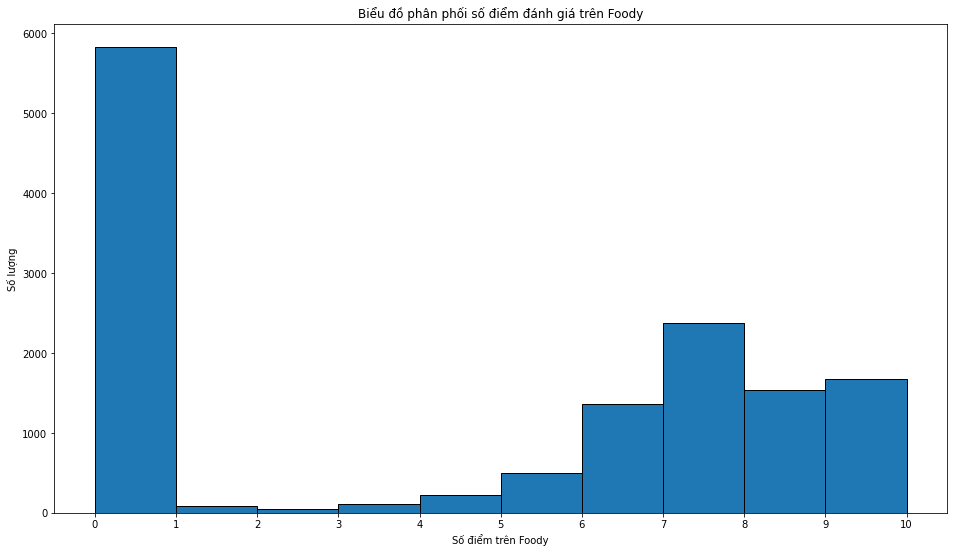

In [8]:
fig, ax = plt.subplots(figsize = (16,9))
ax.hist(df['Số sao trên Foody'], edgecolor = 'black')
ax.set_xticks(np.arange(0,11,1))
ax.set_xlabel('Số điểm trên Foody')
ax.set_ylabel('Số lượng')
ax.set_title('Biểu đồ phân phối số điểm đánh giá trên Foody')

Text(0.5, 1.0, 'Biểu đồ phân phối số điểm đánh giá trên Foody')

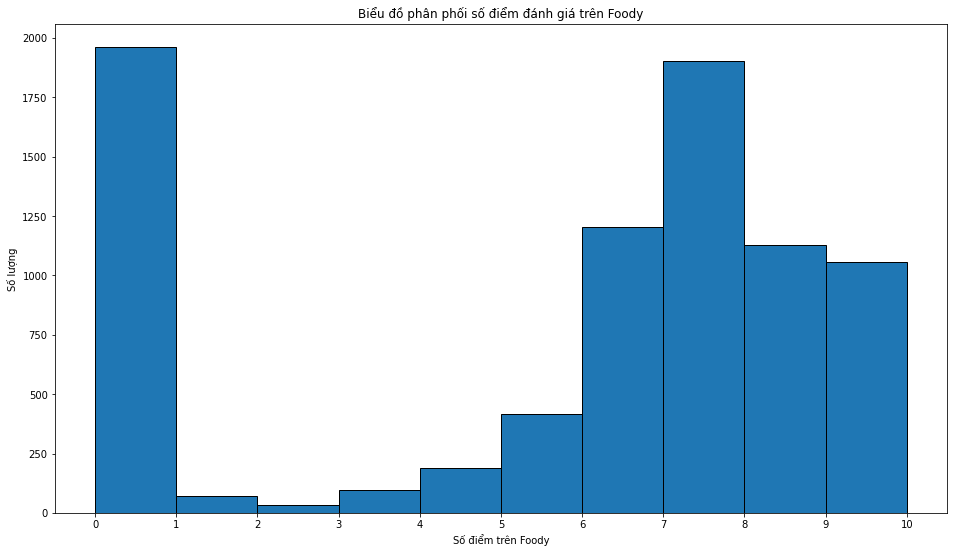

In [9]:
fig,ax = plt.subplots(figsize = (16,9))
ax.hist(df.loc[df['Số lượt đánh giá trên ShopeeFood'] != '< 100', 'Số sao trên Foody'], edgecolor = 'black') 
ax.set_xticks(np.arange(0,11,1))
ax.set_xlabel('Số điểm trên Foody')
ax.set_ylabel('Số lượng')
ax.set_title('Biểu đồ phân phối số điểm đánh giá trên Foody')

Để đảm bảo tính đánh giá khách quan hơn, ta sẽ lọc đi các shop có số lượng đánh giá trên ShopeeFood < 100

In [10]:
high_rating_df = df[(df['Số lượt đánh giá trên ShopeeFood'] != '< 100') & (df['Số sao trên Foody'] >= 8.0)]
low_rating_df = df[(df['Số lượt đánh giá trên ShopeeFood'] != '< 100') & (df['Số sao trên Foody'] <= 5.0)]

Số lượng các shop được đánh giá cao (điểm Foody >= 8.0) và các shop bị đánh giá thấp (điểm Foody <= 5.0) theo tổng số lượng sản phẩm

Text(0.5, 1.0, 'Histogram của các cửa hàng được đánh giá thấp')

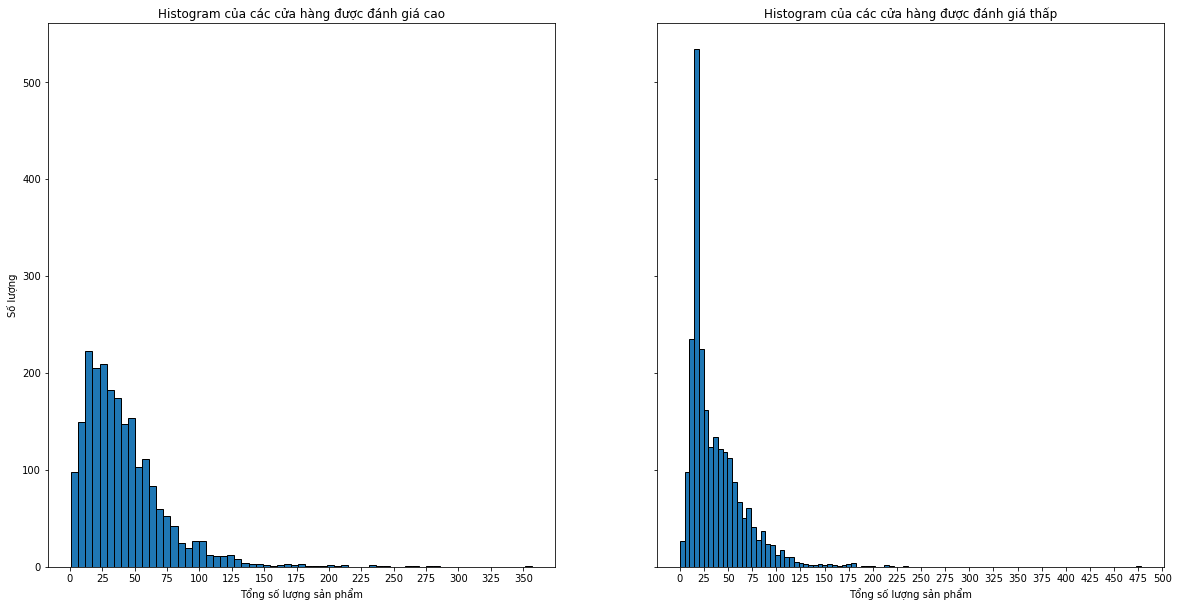

In [11]:
fig, axes = plt.subplots(1,2, figsize = (20,10), sharey = True)
axes[0].hist(high_rating_df['Tổng số lượng sản phẩm'], edgecolor = 'black', bins = 'auto')
axes[0].xaxis.set_major_locator(ticker.MultipleLocator(25))
axes[0].set_xlabel('Tổng số lượng sản phẩm')
axes[0].set_ylabel('Số lượng')
axes[0].set_title('Histogram của các cửa hàng được đánh giá cao')
axes[1].hist(low_rating_df['Tổng số lượng sản phẩm'], edgecolor = 'black', bins = 'auto')
axes[1].xaxis.set_major_locator(ticker.MultipleLocator(25))
axes[1].set_xlabel('Tổng số lượng sản phẩm')
axes[1].set_title('Histogram của các cửa hàng được đánh giá thấp')

Tiền xử lý một chút ở đây trước khi trực quan

In [12]:
df_list = []

bins = np.arange(0,high_rating_df['Tổng số lượng sản phẩm'].max(),5)
total_prod_count = high_rating_df['Tổng số lượng sản phẩm'].value_counts(bins = bins)
total_prod_high = total_prod_count.to_frame(name = 'count_percent').reset_index().rename(columns = {'index' : 'total_products'})
total_prod_high['total_products'] = total_prod_high['total_products'].apply(lambda x : '-'.join(re.findall(r'(\d+)\.', str(x))))
total = total_prod_high['count_percent'].sum()
total_prod_high['count_percent'] = total_prod_high['count_percent'].apply(lambda x : (x/total)*100)


bins = np.arange(0,low_rating_df['Tổng số lượng sản phẩm'].max(),5)
total_prod_count = low_rating_df['Tổng số lượng sản phẩm'].value_counts(bins = bins)
total_prod_low = total_prod_count.to_frame(name = 'count_percent').reset_index().rename(columns = {'index' : 'total_products'})
total_prod_low['total_products'] = total_prod_low['total_products'].apply(lambda x : '-'.join(re.findall(r'(\d+)\.', str(x))))
total = total_prod_low['count_percent'].sum()
total_prod_low['count_percent'] = total_prod_low['count_percent'].apply(lambda x : (x/total)*100)

total_prod_df = total_prod_high.merge(total_prod_low, on = 'total_products', suffixes = ['_high', '_low'])
total_prod_df

,total_products,count_percent_high,count_percent_low
0,15-20,9.610984,21.806076
1,10-15,8.375286,12.317936
2,25-30,8.192220,6.283812
3,20-25,7.917620,6.991261
4,30-35,7.597254,5.534748
...,...,...,...
66,225-230,0.000000,0.000000
67,220-225,0.000000,0.000000
68,215-220,0.000000,0.041615
69,185-190,0.000000,0.041615


Số lượng sản phẩm chiếm nhiều nhất ở các shop được đánh giá cao và shop bị đánh giá thấp

Text(0, 0.5, 'Phần trăm số lượng so với tổng số cửa hàng (%)')

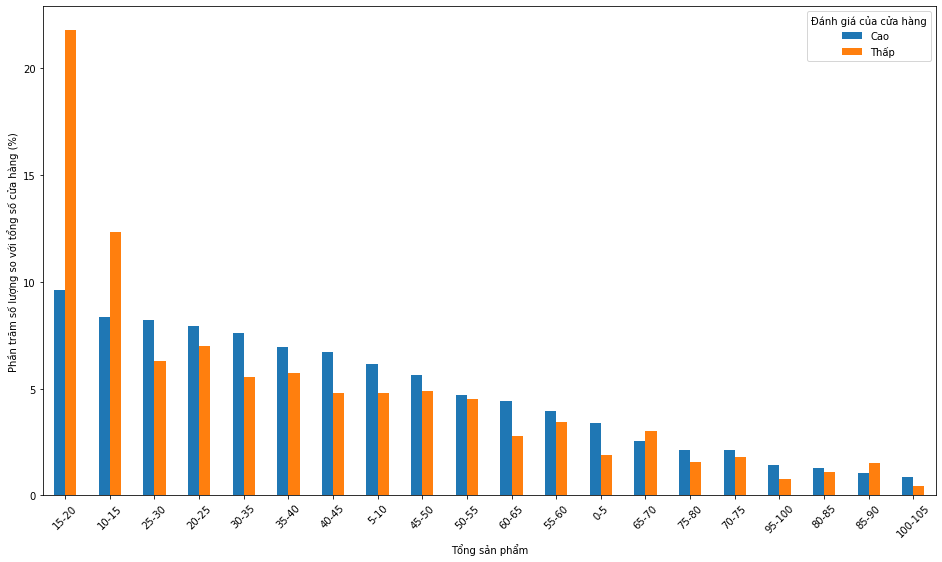

In [13]:
fig,ax = plt.subplots(figsize = (16,9))
total_prod_df.head(20).plot.bar(x = 'total_products', y = ['count_percent_high', 'count_percent_low'], ax = ax)
ax.set_xticklabels(labels = ax.get_xticklabels(), rotation = 45)
ax.legend(labels = ['Cao', 'Thấp'], title = 'Đánh giá của cửa hàng')
ax.set_xlabel('Tổng sản phẩm')
ax.set_ylabel('Phần trăm số lượng so với tổng số cửa hàng (%)')


### Mối quan hệ giữa số sao trên Foody và tổng số lượng sản phẩm

Text(0, 0.5, 'Số điểm trên Foody')

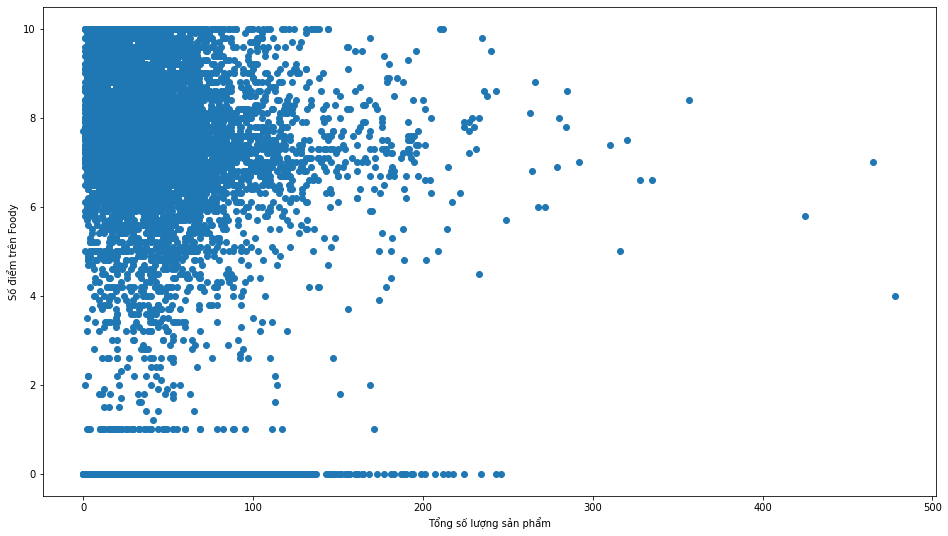

In [14]:
fig,ax = plt.subplots(figsize = (16,9))
ax.scatter(x = df['Tổng số lượng sản phẩm'], y= df['Số sao trên Foody'])
ax.set_xlabel('Tổng số lượng sản phẩm')
ax.set_ylabel('Số điểm trên Foody')


Scatter plot theo từng số lượng lượt đánh giá trên ShopeeFood

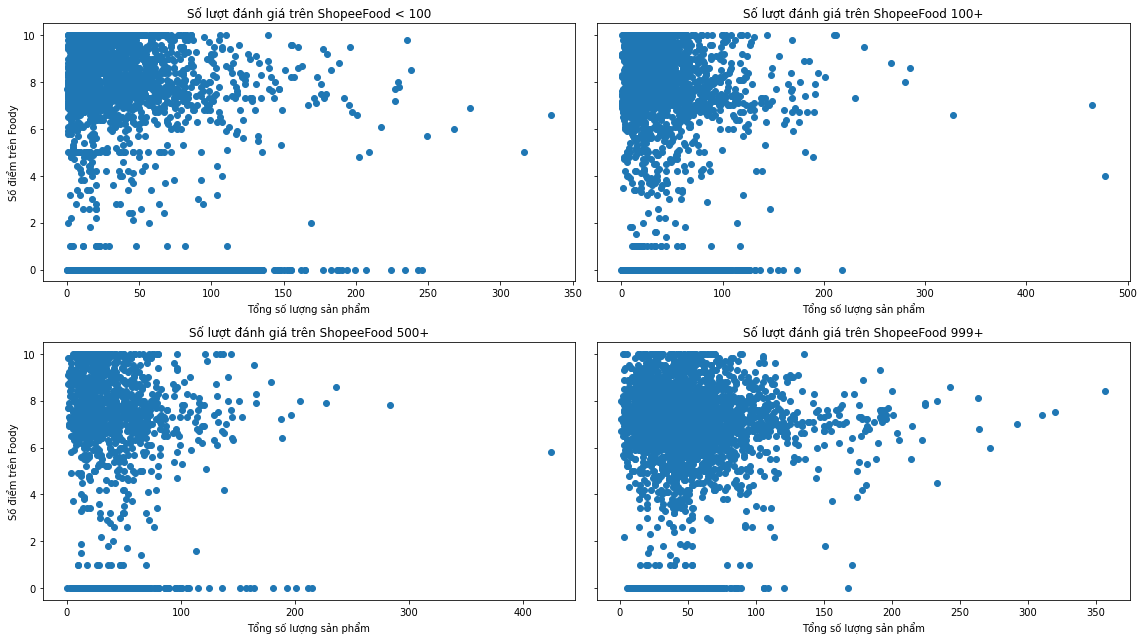

In [15]:
shopee_rating_count = ['< 100', '100+', '500+', '999+']
fig, axes = plt.subplots(2,2, figsize = (16,9), sharey = True)
i = 0
for c, ax in zip(shopee_rating_count, axes.flat):
  data = df[df['Số lượt đánh giá trên ShopeeFood'] == c]
  ax.scatter(x = data['Tổng số lượng sản phẩm'], y = data['Số sao trên Foody'])
  ax.set_xlabel('Tổng số lượng sản phẩm')
  if i % 2 == 0:
    ax.set_ylabel('Số điểm trên Foody')
  ax.set_title('Số lượt đánh giá trên ShopeeFood {}'.format(c))
  i += 1
plt.tight_layout()

### Phân tích trên từng loại cửa hàng

Biểu đồ phân bố của số lượng sản phẩm theo từng cửa hàng

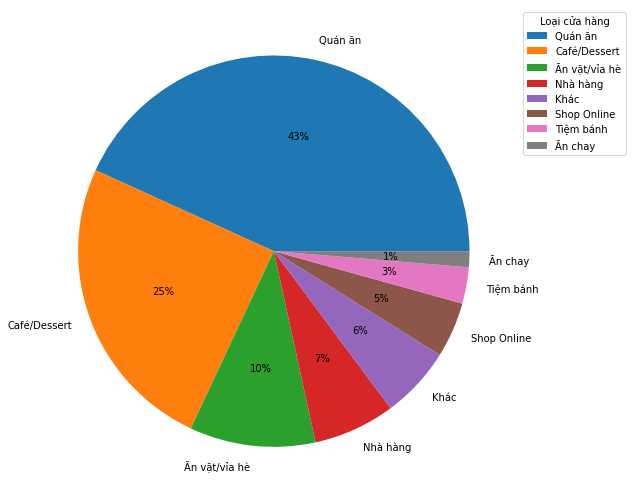

In [16]:
shop_types = ['Quán ăn', 'Café/Dessert', 'Ăn vặt/vỉa hè', 'Nhà hàng', 'Shop Online', 'Tiệm bánh', 'Ăn chay']
new_df = df[['Loại cửa hàng','Tổng số lượng sản phẩm']].reset_index(drop = True)
new_df['Loại cửa hàng'] = new_df['Loại cửa hàng'].apply(lambda x : 'Khác' if x not in shop_types else x)
shop_type_count = new_df['Loại cửa hàng'].value_counts()
fig,ax = plt.subplots(figsize = (16,9))
ax.pie(shop_type_count.values, labels = shop_type_count.index, autopct = '%0.0f%%')
ax.legend(loc = 'upper left', bbox_to_anchor=(1, 1), title = 'Loại cửa hàng')


Boxplot của từng loại shop theo tổng số lượng sản phẩm đối với các shop được đánh giá cao và bị đánh giá thấp

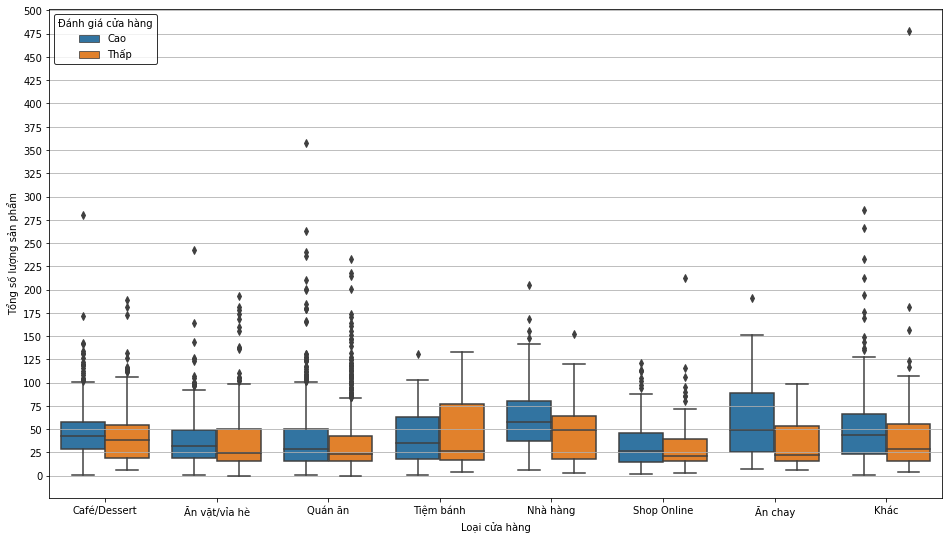

In [17]:
high_shop_type_df = high_rating_df[['Loại cửa hàng','Tổng số lượng sản phẩm']].reset_index(drop = True)
high_shop_type_df['Loại cửa hàng'] = high_shop_type_df['Loại cửa hàng'].apply(lambda x : 'Khác' if x not in shop_types else x)
low_shop_type_df = low_rating_df[['Loại cửa hàng','Tổng số lượng sản phẩm']].reset_index(drop = True)
low_shop_type_df['Loại cửa hàng'] = low_shop_type_df['Loại cửa hàng'].apply(lambda x : 'Khác' if x not in shop_types else x)
high_shop_type_df['overall rate'] = 'Cao'
low_shop_type_df['overall rate'] = 'Thấp'

combined_df = pd.concat([high_shop_type_df, low_shop_type_df])

fig,ax = plt.subplots(figsize = (16,9))
sns.boxplot(data = combined_df, x = 'Loại cửa hàng', y = 'Tổng số lượng sản phẩm', hue = 'overall rate', ax = ax)
ax.yaxis.set_major_locator(ticker.MultipleLocator(25))
ax.grid(axis = 'y')
legend = ax.get_legend()
legend.set_title('Đánh giá cửa hàng')
legend.get_frame().set_edgecolor('black')